In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import os
import tensorflow as tf
import PIL
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from random import randrange
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [10]:
batch_size = 5
img_height = 360
img_width = 640

In [11]:
model_dir = r'D:\Dokumente\Uni\Signalverarbeitung\Project\rotordetection\deep_learning\model\rotordet_net_v4'
model_name = os.path.basename(model_dir)
model = tf.keras.models.load_model(model_dir)

In [12]:
# model.summary()
model.layers[0].input_shape

(None, 360, 640, 3)

In [13]:
test_dir = r'D:\Dokumente\Uni\Signalverarbeitung\Project\data\training\test\eval'
test_datagen = ImageDataGenerator(
    # rotation_range=360,
    # shear_range=0.3,
    # zoom_range=[1,2]
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)
n_classes = len(test_generator.class_indices)
test_generator.class_indices

Found 6874 images belonging to 4 classes.


{'DL1': 0, 'DL2': 1, 'DL3': 2, 'DL_BG': 3}

In [14]:
# test_dir = r'D:\Dokumente\Uni\Signalverarbeitung\Project\data\training\test'
test_dir = r'D:\Dokumente\Uni\Signalverarbeitung\Project\data\final\data\test'
test_results = {}
for test_condition in os.listdir(test_dir):
    test_set_dir = os.path.join(test_dir,test_condition)
    print(test_condition)
    if 'eval' in test_condition:
        test_generator = test_datagen.flow_from_directory(
            test_set_dir,
            target_size=(img_height, img_width),
            batch_size=batch_size,
            class_mode="categorical"
        )
        curr_test_results = model.evaluate(test_generator)
        test_results_merged = curr_test_results
        continue
    elif 'merged' in test_condition:
        continue
        
    # test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    #     test_set_dir,
    #     label_mode = 'categorical',
    #     smart_resize = True,
    #     image_size=(img_height, img_width),
    #     batch_size=batch_size)

    test_generator = test_datagen.flow_from_directory(
        test_set_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode="categorical"
    )
    curr_test_results = model.evaluate(test_generator)
    test_results[test_condition] = curr_test_results
    

baseline
Found 1189 images belonging to 4 classes.
238/238 [==============================] - 27s 95ms/step - loss: 0.0125 - accuracy: 0.9966
daemmerung_leicht
Found 652 images belonging to 4 classes.
131/131 [==============================] - 13s 100ms/step - loss: 2.5811e-06 - accuracy: 1.0000
daemmerung_stark
Found 880 images belonging to 4 classes.
176/176 [==============================] - 17s 94ms/step - loss: 0.3811 - accuracy: 0.9534
eval
Found 6874 images belonging to 4 classes.
1375/1375 [==============================] - 130s 94ms/step - loss: 0.1232 - accuracy: 0.9760
free_DL
Found 1709 images belonging to 4 classes.
342/342 [==============================] - 34s 100ms/step - loss: 0.1153 - accuracy: 0.9778
IR
Found 795 images belonging to 4 classes.
159/159 [==============================] - 14s 89ms/step - loss: 0.1882 - accuracy: 0.9308
low_res
Found 844 images belonging to 4 classes.
169/169 [==============================] - 15s 89ms/step - loss: 0.0022 - accuracy: 0.9

In [15]:
# Confusion Matrix
confusion_mats = {}

for test_condition in os.listdir(test_dir):
    test_set_dir = os.path.join(test_dir,test_condition)
    print(test_condition + ':')
    if 'merged' in test_condition:
        continue
    test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        test_set_dir,
        label_mode = 'categorical',
        smart_resize = True,
        image_size=(img_height, img_width),
        batch_size=batch_size)

    y_pred = np.array([])
    y_gt =  np.array([])
    for x, y in test_ds:
        y_pred = np.concatenate([y_pred, np.argmax(model.predict(x),axis=-1)])
        y_gt = np.concatenate([y_gt, np.argmax(y.numpy(), axis=-1)])

    confusion_mats[test_condition] = tf.math.confusion_matrix(labels=y_gt, predictions=y_pred).numpy()

baseline:
Found 1189 files belonging to 4 classes.
daemmerung_leicht:
Found 652 files belonging to 4 classes.
daemmerung_stark:
Found 880 files belonging to 4 classes.
eval:
Found 6874 files belonging to 4 classes.
free_DL:
Found 1709 files belonging to 4 classes.
IR:
Found 795 files belonging to 4 classes.
low_res:
Found 844 files belonging to 4 classes.
merged:
regen:
Found 1014 files belonging to 4 classes.
regen_low_res_low_fps:
Found 1340 files belonging to 4 classes.
schatten:
Found 660 files belonging to 4 classes.
winkel:
Found 723 files belonging to 4 classes.


In [16]:
conditions_names2keys = {
        'baseline': 'indoor',
        'daemmerung_leicht': 'dusk',
        'daemmerung_stark': 'dark',
        'IR': 'IR',
        'low_res': 'lowres',
        'regen': 'rain',
        'schatten': 'shadow',
        'winkel': 'angle',
    }

In [17]:
# ./frames_labeled/Schatten ; 0.4485645933014354
# ./frames_labeled/Niedrige_Aufloesung ; 0.9635294117647059
# ./frames_labeled/IR ; 0.9114391143911439
# ./frames_labeled/Drinnen_baseline ; 0.9474327628361858
# ./frames_labeled/Daemmerung_Leicht ; 0.9597560975609756
# ./frames_labeled/Regen_1280x702 ; 0.37089201877934275
# ./frames_labeled/Regen_854x480 ; 0.7426108374384236
# ./frames_labeled/Winkel ; 0.28604651162790695
# ./frames_labeled/Daemmerung_Stark ; 0.9403166869671132

test_results_BC = {
    'baseline' : 0.9474327628361858,
    'daemmerung_leicht' : 0.9597560975609756,
    'daemmerung_stark' : 0.9403166869671132,
    'IR' : 0.9114391143911439,
    'low_res' : 0.9635294117647059,
    'regen' : 0.37089201877934275,
    'schatten' : 0.4485645933014354,
    'winkel' : 0.28604651162790695,
}

In [18]:
n_cond = len(conditions_names2keys)
acc_DL = [0 for i in range(n_cond)]
acc_BC = [0 for i in range(n_cond)]
label = ['' for i in range(n_cond)]
for count, condition in enumerate(conditions_names2keys.keys()):
    acc_DL[count] = test_results[condition][1]
    acc_BC[count] = test_results_BC[condition]
    label[count] = conditions_names2keys[condition]


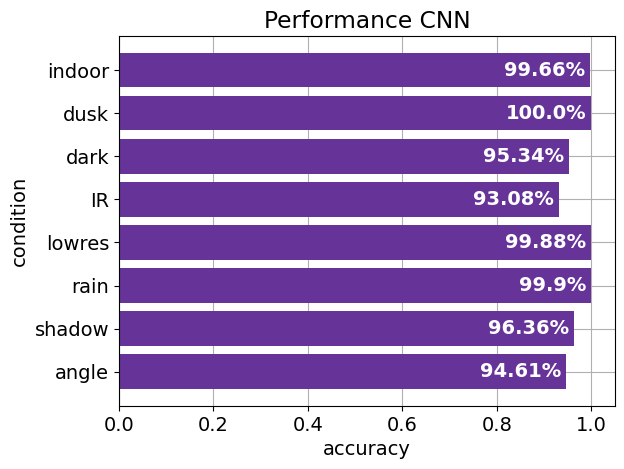

In [19]:

outputfolder = r'D:\Dokumente\Uni\Signalverarbeitung\Project\rotordetection\deep_learning\model\output\accuracy'

plt.rcParams.update({'font.size': 14})
fig1, ax1 = plt.subplots()
x_plt = np.arange(n_cond,0,-1)
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.barh(x_plt,acc_DL,facecolor='rebeccapurple')
plt.yticks(x_plt,label)
plt.ylabel('condition')
plt.xlabel('accuracy')
plt.title('Performance CNN')


for i, y in enumerate(acc_DL):
    ax1.text(y-0.01, n_cond-i, '{}%'.format(np.round(y*100,2)), color='white', fontweight='bold',verticalalignment='center',horizontalalignment='right')

plt.savefig(os.path.join(outputfolder,model_name+'.svg'),bbox_inches='tight')
plt.savefig(os.path.join(outputfolder,model_name+'.pdf'),bbox_inches='tight')
plt.savefig(os.path.join(outputfolder,model_name+'.png'),bbox_inches='tight')

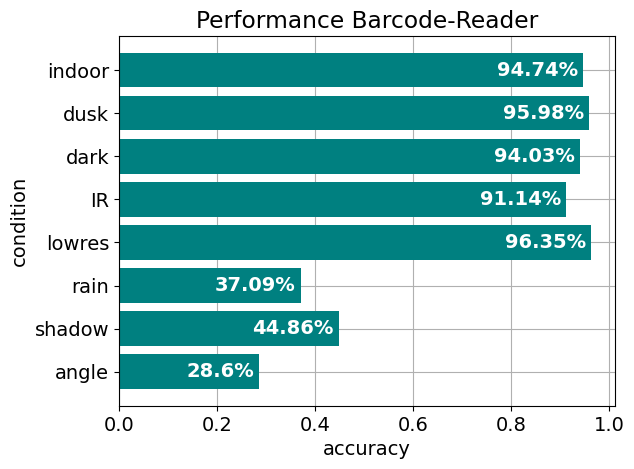

In [20]:
fig2, ax2 = plt.subplots()
x_plt = np.arange(n_cond,0,-1)
ax2.barh(x_plt,acc_BC,facecolor='teal')
ax2.grid(True)
ax2.set_axisbelow(True)
plt.yticks(x_plt,label)
plt.ylabel('condition')
plt.xlabel('accuracy')
plt.title('Performance Barcode-Reader')
for i, y in enumerate(acc_BC):
    ax2.text(y-0.01, n_cond-i, '{}%'.format(np.round(y*100,2)), color='white', fontweight='bold',verticalalignment='center',horizontalalignment='right')

plt.savefig(os.path.join(outputfolder,'barcode_reader.svg'),bbox_inches='tight')
plt.savefig(os.path.join(outputfolder,'barcode_reader.png'),bbox_inches='tight')

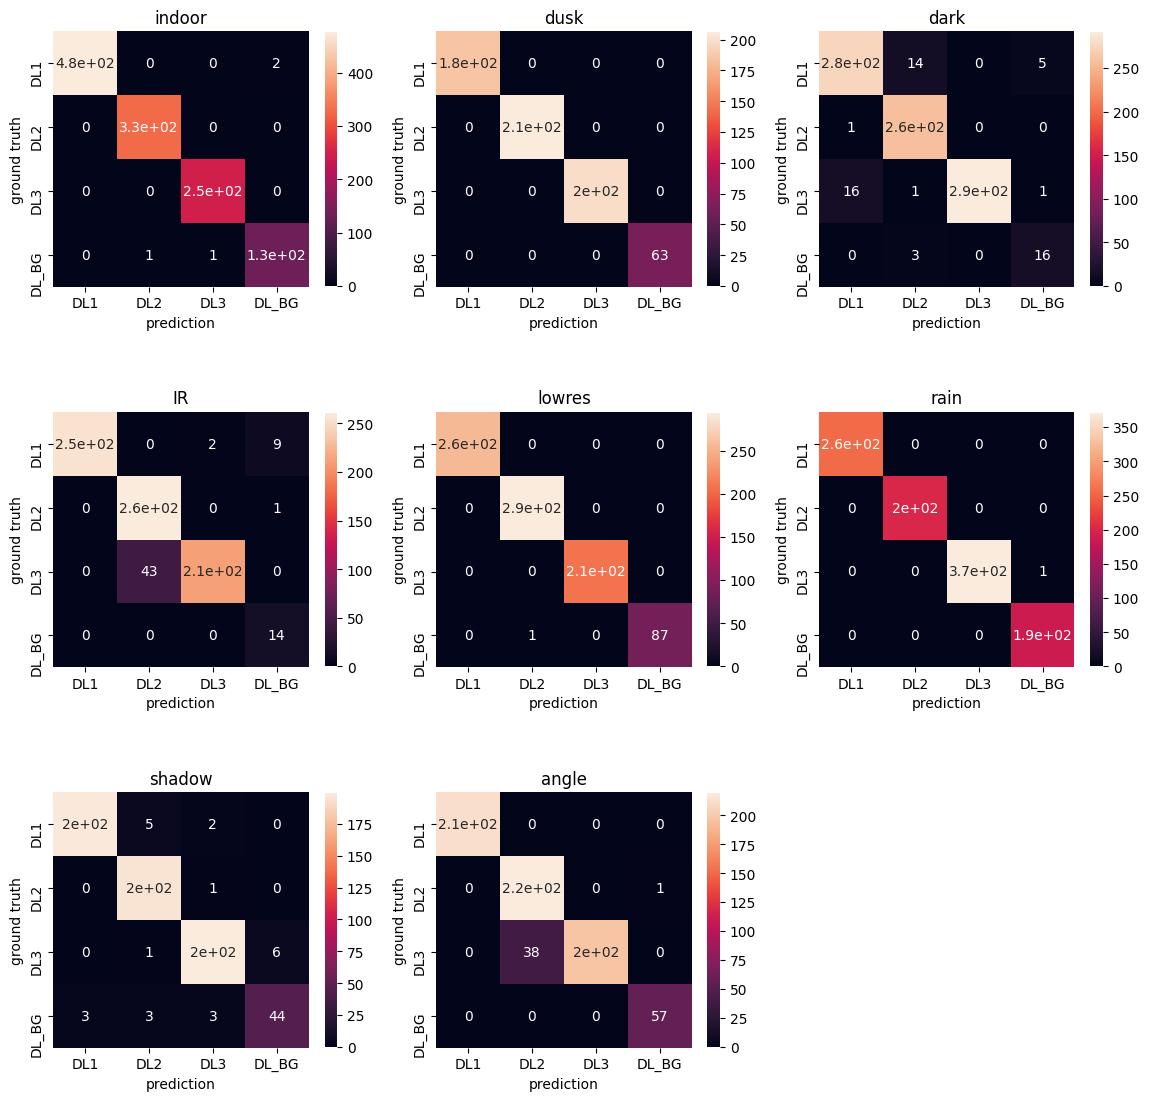

In [21]:
import matplotlib as mpl
mpl.rcdefaults()
# outputfolder = r'D:\Dokumente\Uni\Signalverarbeitung\Project\model\output\confusion_mat'
outputfolder = r'D:\Dokumente\Uni\Signalverarbeitung\Project\rotordetection\deep_learning\model\output\confusion_mat'

plt.figure(figsize=(14,14))
for i,cond in enumerate(conditions_names2keys.keys()):
    plt.subplot(3,3,i+1)
    # plt.imshow(confusion_mats[cond])
    
    sn.heatmap(confusion_mats[cond], annot=True,square=True,xticklabels=['DL1','DL2','DL3','DL_BG'],yticklabels=['DL1','DL2','DL3','DL_BG'],cbar_kws={"shrink":0.8})
    plt.ylabel('ground truth')
    plt.xlabel('prediction')
    plt.title(conditions_names2keys[cond])

plt.savefig(os.path.join(outputfolder,'confusion_mat.png'),bbox_inches='tight')

In [3]:
from confusion_matrix import confusion_matrix_of_scenes
confusion_mat_BC = confusion_matrix_of_scenes

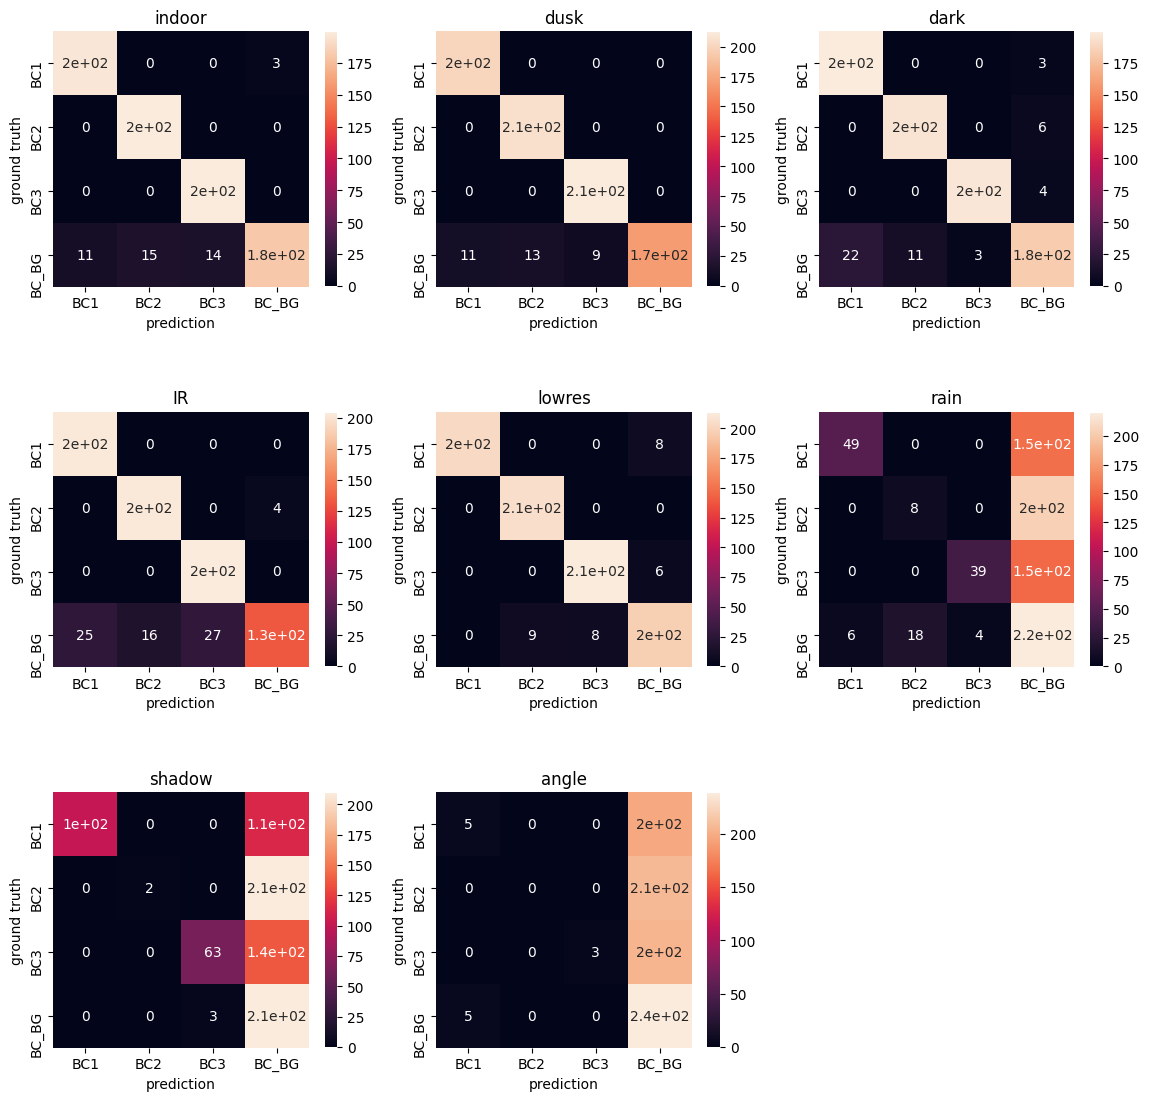

In [9]:
import matplotlib as mpl
mpl.rcdefaults()

outputfolder = r'D:\Dokumente\Uni\Signalverarbeitung\Project\rotordetection\deep_learning\model\output\confusion_mat'

plt.figure(figsize=(14,14))
for i,cond in enumerate(conditions_names2keys.keys()):
    plt.subplot(3,3,i+1)
    # plt.imshow(confusion_mats[cond])
    
    sn.heatmap(confusion_mat_BC[conditions_names2keys[cond]], annot=True,square=True,xticklabels=['BC1','BC2','BC3','BC_BG'],yticklabels=['BC1','BC2','BC3','BC_BG'],cbar_kws={"shrink":0.8})
    plt.ylabel('ground truth')
    plt.xlabel('prediction')
    plt.title(conditions_names2keys[cond])

plt.savefig(os.path.join(outputfolder,'confusion_mat_BC.png'),bbox_inches='tight')

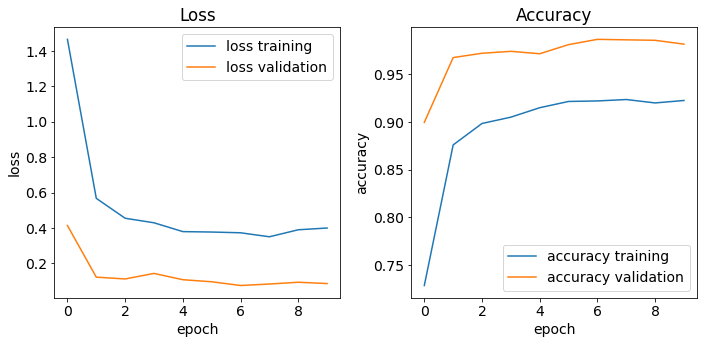

In [76]:
fhist = np.load(r'D:\Dokumente\Uni\Signalverarbeitung\Project\rotordetection\deep_learning\model\rotordet_net_v4\my_history.npy',allow_pickle=True)

loss_train = fhist.item(0)['loss']
loss_val = fhist.item(0)['val_loss']
acc_train = fhist.item(0)['accuracy']
acc_val = fhist.item(0)['val_accuracy']


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(loss_train, label='loss training')
plt.plot(loss_val, label='loss validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(acc_train, label='accuracy training')
plt.plot(acc_val, label='accuracy validation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.legend()
plt.tight_layout()

plt.savefig(os.path.join(outputfolder,'train_hist_'+model_name+'.png'),bbox_inches='tight')